<a href="https://colab.research.google.com/github/andreafalcon05-collab/Inteligencia-Artificial/blob/main/Multicapa/Clasificacion_de_candidatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Clasificación de un candidato a un empleo

In [ ]:
"""Generar dataset sintético con diferentes rangos por habilidad"""

import numpy as np
import pandas as pd

# Generar dataset sintético con diferentes rangos por habilidad
n_muestras = 5000
# Habilidades técnicas: 70-100
tec = np.random.randint(70, 101, (n_muestras, 6))
# Habilidades matemáticas: 60-90
mat = np.random.randint(60, 91, (n_muestras, 6))
# Habilidades psicológicas: 50-85
psi = np.random.randint(50, 86, (n_muestras, 6))
# Nombres de columnas
columnas = [
    'python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube',
    'estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado',
    'trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas'
]
# Crear DataFrame
df = pd.DataFrame(np.concatenate([tec, mat, psi], axis=1), columns=columnas)

In [ ]:
df

,python,sql,visualizacion_datos,excel,manejo_apis,nube,estadistica,probabilidad,algebra_lineal,calculo,optimizacion,modelado,trabajo_equipo,comunicacion,creatividad,adaptabilidad,liderazgo,resolucion_problemas
0,72,100,72,83,85,76,70,68,83,78,79,73,60,74,55,59,77,74
1,78,73,80,89,70,100,64,86,69,62,88,77,64,57,71,74,61,63
2,80,93,82,85,81,97,90,74,84,75,87,66,68,66,83,56,52,67
3,96,98,91,86,73,99,87,78,80,86,84,60,76,55,54,63,56,65
4,88,92,85,98,74,85,86,90,88,69,63,72,56,72,74,63,76,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,84,90,79,70,70,75,86,65,74,62,63,87,68,53,66,76,78,71
4996,80,82,80,77,94,91,61,83,86,81,89,68,53,81,67,71,85,64
4997,83,80,79,84,92,85,84,72,85,74,81,80,57,77,53,53,57,62
4998,99,91,99,95,84,97,85,81,87,70,66,83,74,63,80,67,70,72


In [ ]:
"""Obtenemos la etiqueta y"""

# Calcular promedio por grupo y promedio total
prom_tecnologicas = df[['python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube']].mean(axis=1)#horizontal
prom_matematicas  = df[['estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado']].mean(axis=1)
prom_psicologicas = df[['trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas']].mean(axis=1)
# Promedio total = promedio de los 3 promedios
prom_total = (prom_tecnologicas + prom_matematicas + prom_psicologicas) / 3
# Etiqueta: 1 = apto si promedio total > 80
y = (prom_total > 75).astype(int)
# one-hot encoding
y = pd.get_dummies(y).values

In [ ]:
#Muestra el vector de clases, TRUE(Apto) FALSE(No apto)
y

array([[ True, False],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [False,  True]])

In [ ]:
"""Obtenemos los conjuntos de entrenamiento y de test"""

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42
)

# Escalamiento
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train #resultados

array([[ 1.12325626, -1.21701313, -0.10664156, ..., -0.15239955,
        -1.46527064, -1.01046552],
       [-0.11371722, -1.10407838, -1.22126459, ...,  0.71611142,
         1.00876372, -1.29898447],
       [-1.57559497,  0.36407341,  0.00482074, ..., -0.05589833,
        -0.7040293 ,  0.33595628],
       ...,
       [ 0.44854345,  1.49342094, -1.22126459, ..., -0.63490565,
         0.72329822, -0.81811954],
       [-1.0133343 ,  0.25113866,  1.67675529, ...,  1.68112362,
        -0.60887413, -0.72194656],
       [ 0.78589986,  1.26755143,  0.45066996, ...,  0.13710411,
         1.48453956,  0.04743733]])

In [ ]:
X_test #resultados

array([[-1.23823857e+00, -1.21701313e+00,  1.45383069e+00, ...,
        -1.21391296e+00, -9.89494803e-01, -1.01046552e+00],
       [-1.13717221e-01,  1.04168193e+00, -2.18103862e-01, ...,
         6.19610204e-01,  2.47522381e-01,  7.20648224e-01],
       [-5.63525759e-01,  1.26755143e+00,  4.82074461e-03, ...,
         3.30106546e-01,  6.28143053e-01,  2.39783296e-01],
       ...,
       [-1.46314284e+00, -3.13535107e-01,  8.96519170e-01, ...,
         1.00561508e+00,  9.13608556e-01,  3.35956282e-01],
       [-1.26508651e-03,  1.49342094e+00, -2.18103862e-01, ...,
         9.09113862e-01,  1.52367213e-01, -9.14292530e-01],
       [ 1.12325626e+00,  1.60635569e+00,  8.96519170e-01, ...,
        -2.48900770e-01, -1.37011547e+00,  1.58620509e+00]])

In [ ]:
"""Red Neuronal"""

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],#columas del df
                           ), activation='relu'),#capa oculta
    Dense(32, activation='relu'),#capa oculta
    Dense(16, activation='relu'),#capa oculta
    Dense(2, activation='softmax') #salida
])

adam = Adam(learning_rate=0.001)
modelo.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
"""Entrenamiento"""

history = modelo.fit(
    X_train, y_train,
    epochs=50,
    batch_size=1,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8438 - loss: 0.3080 - val_accuracy: 0.9620 - val_loss: 0.0878
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9686 - loss: 0.0758 - val_accuracy: 0.9660 - val_loss: 0.0756
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9824 - loss: 0.0504 - val_accuracy: 0.9720 - val_loss: 0.0699
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9826 - loss: 0.0464 - val_accuracy: 0.9760 - val_loss: 0.0632
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9884 - loss: 0.0322 - val_accuracy: 0.9750 - val_loss: 0.0726
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9897 - loss: 0.0318 - val_accuracy: 0.9760 - val_loss: 0.0527
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9904 - loss: 0.0263 - val_accuracy: 0.9760 - val_loss: 0.0708
Epoch 8/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9880 - loss: 0

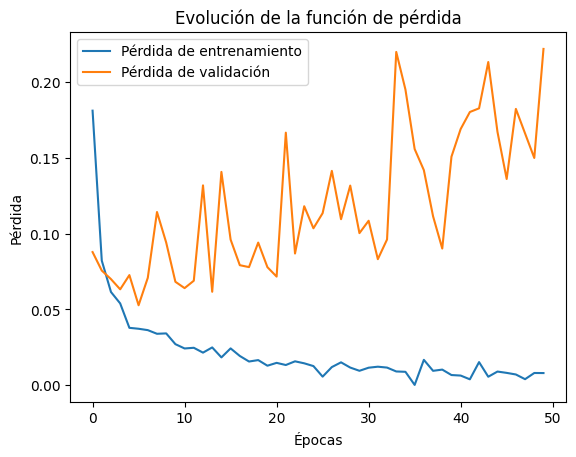

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9693 - loss: 0.1950

🔹 Loss: 0.2219  |  Accuracy: 0.9670


In [ ]:
"""Evalucion"""

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la función de pérdida')
plt.show()

loss, acc = modelo.evaluate(X_test, y_test)
print(f"\n🔹 Loss: {loss:.4f}  |  Accuracy: {acc:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


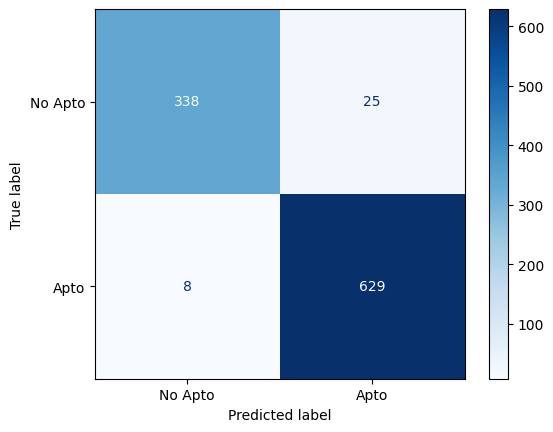


Sensitivity (Recall) por clase:
No Apto: 0.93
Apto: 0.99


In [ ]:
"""Matriz de confusion"""

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

pred = modelo.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Apto', 'Apto'])
disp.plot(cmap='Blues')
plt.show()

sensitivity = recall_score(y_true, y_pred, average=None)
print("\nSensitivity (Recall) por clase:")
print(f"No Apto: {sensitivity[0]:.2f}")
print(f"Apto: {sensitivity[1]:.2f}")

In [ ]:
"""Evaluar un nuevo candidato"""

nuevo_candidato = np.array([[90, 88, 85, 87, 84, 89,   # técnicas
                             82, 86, 85, 83, 87, 80,   # matemáticas
                             70, 75, 80, 72, 78, 74]]) # psicológicas

nuevo_candidato_scaled = scaler.transform(nuevo_candidato)
pred_nuevo = modelo.predict(nuevo_candidato_scaled)
clase_predicha = np.argmax(pred_nuevo)

print("Evaluación de nuevo candidato:")
print(f"Resultado: {'Apto' if clase_predicha == 1 else 'No Apto'}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
Evaluación de nuevo candidato:
Resultado: Apto
